# Spring'22 - IE 360 Term Project Report
## Group 18
### Oğuzhan Akbaş & M. Fatih Şahin
### ~06.06.2022

## 1. Introduction
### 1.1 1.	Problem description

 The purpose of the project is to make forecasts for the hourly production rate of a solar energy central in Mersin, Turkey for the following day. This power plant, KIVANC 2 GES, is located between 36-37° north latitude and 33-35° east longitude. Given data in the project also provides the weather conditions in terms of 4 different measurement types for 9 grid coordinates nearby the power plant. These four different measurements are temperature, relative humidity, downward shortwave radiation flux and low-level cloud percentage which are all somehow related with the production efficiency of the plant.
 
  Temperature, seen as TEMP in the weather data provided, can represent the seasonality. Moreover, it is known that high temperatures affect the solar panels and decrease their efficiency.

 Humidity is the concentration of water vapour present in the air. Relative humidity, seen as REL_HUMIDITY in the weather data provided, seen as a percentage, indicates the current state of (absolute humidity / maximum humidity) given the same temperature. It can provide information about the rainy or cloudy times which potentially decreases the production. 

 Downward shortwave radiation flux, seen as DSWRF in the weather data provided, which is known to be highly related to the production level. 

 Cloud coverage, seen as CLOUD_LOW_LAYER in the data, is the low-level type clouds percentage in the related region at that certain time period. 

 As mentioned, these four indicators are measured and provided for 9 grid points nearby the power plant. The aim of the project is to make production projections onto the next day using all the available and most actual daily data given. 

###### The aim is to build a reliable model, after trying a selection of models ranging from linear regression models to auto-regressive or moving average models, to make predictions. Additionally, at the end, the models are expected to be evaluated within a pre-determined time interval which is from March 1st to May 24th of 2022.


### 1.2	Summary of the Proposed Approach

Our approach, the final model is a seasonal ARIMA model with parameters : ???? 
---------parametrelerin yorumları/anlamları--------------

### 1.3 Descriptive Analysis of the Data

 The data provided starts on the February 1, 2021 and contains hourly information about the plant as mentioned before.
In this section, we are going to examine several features of our dataset.

In [435]:
library(data.table)
require(forecast)
require(ggcorrplot)
require(ggplot2)
require(GGally)

In [436]:
weather = fread("2022-05-30_weather.csv")
production = fread("2022-05-30_production.csv")

production=production[order(date,hour)]
production = production[,month:= as.factor(month(date))]
production = production[,quart:= as.factor(quarter(date))]
head(production,3)

date,hour,production,month,quart
2021-02-01,0,0,2,1
2021-02-01,1,0,2,1
2021-02-01,2,0,2,1


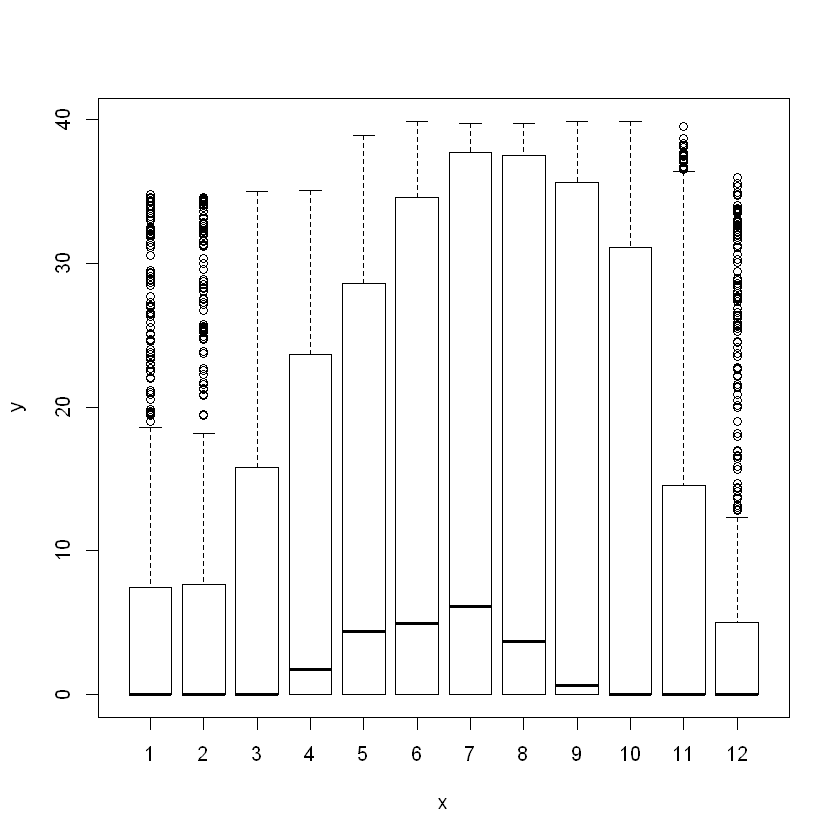

In [437]:
plot(x=production$month,y=production$production)

It can be seen that there is a monthly pattern in the production rate. The mean production rate and also the standard deviation from the mean seem to be increasing in the summer season. When we consider that at nights and in the early mornings the production remains "0" at all seasons, the increasing deviation makes sense as the sun exposure duration increases.

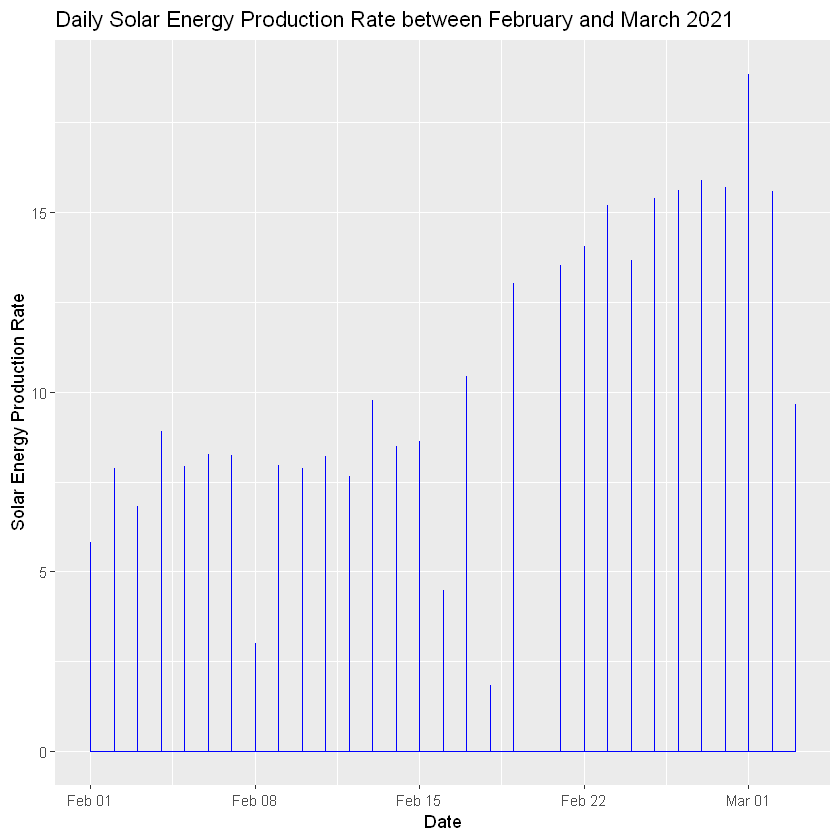

In [438]:
ggplot(production[1:720], aes(x= date, y= production)) +geom_line(color='blue')+ 
labs(x="Date",y="Solar Energy Production Rate", title="Daily Solar Energy Production Rate between February and March 2021")

 As can be seen here, there is an increasing trend in the first months fo the data due to capacity adjustments of the newly constructed plant.

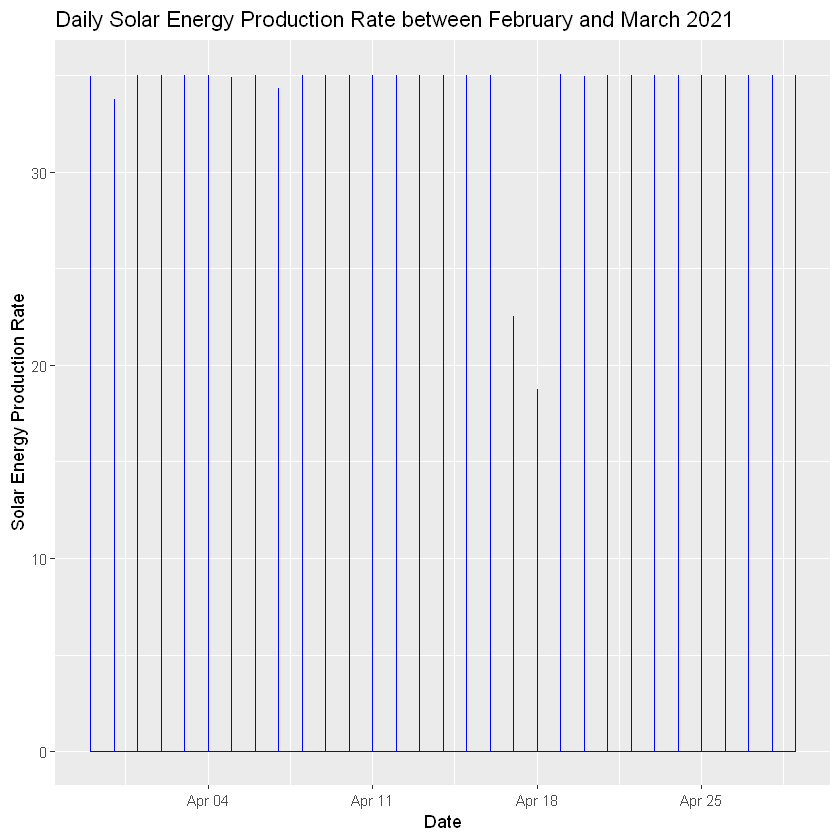

In [439]:
ggplot(production[10000:10720], aes(x= date, y= production)) +geom_line(color='blue')+ 
labs(x="Date",y="Solar Energy Production Rate", title="Daily Solar Energy Production Rate between February and March 2021")

Here we see that as we complete the warm up period so to speak, the production data does not follow the same increasing trend after the first couple months.

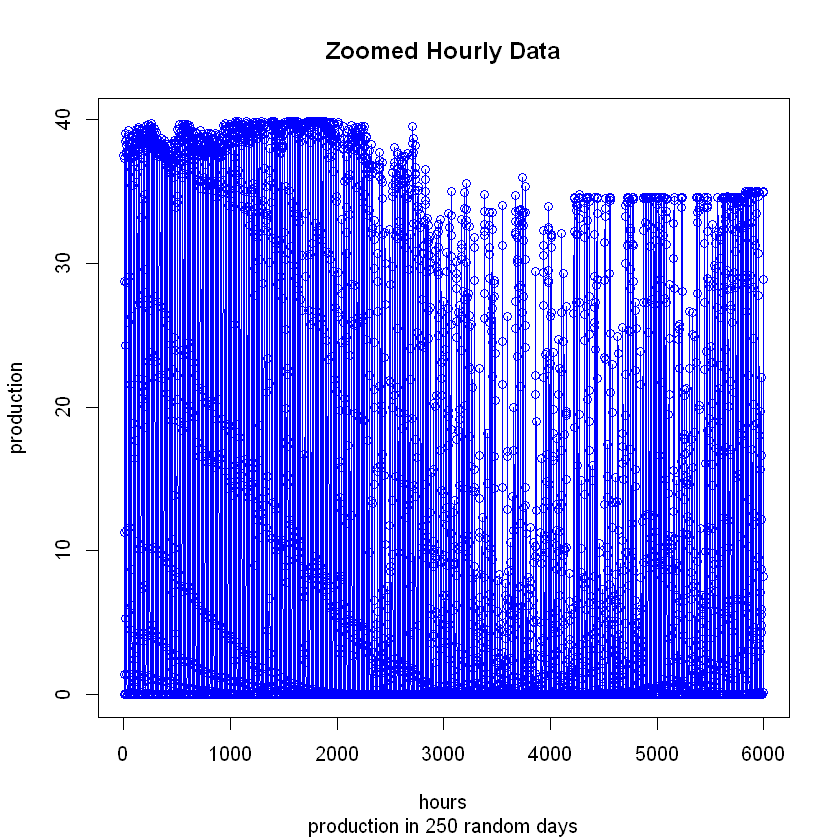

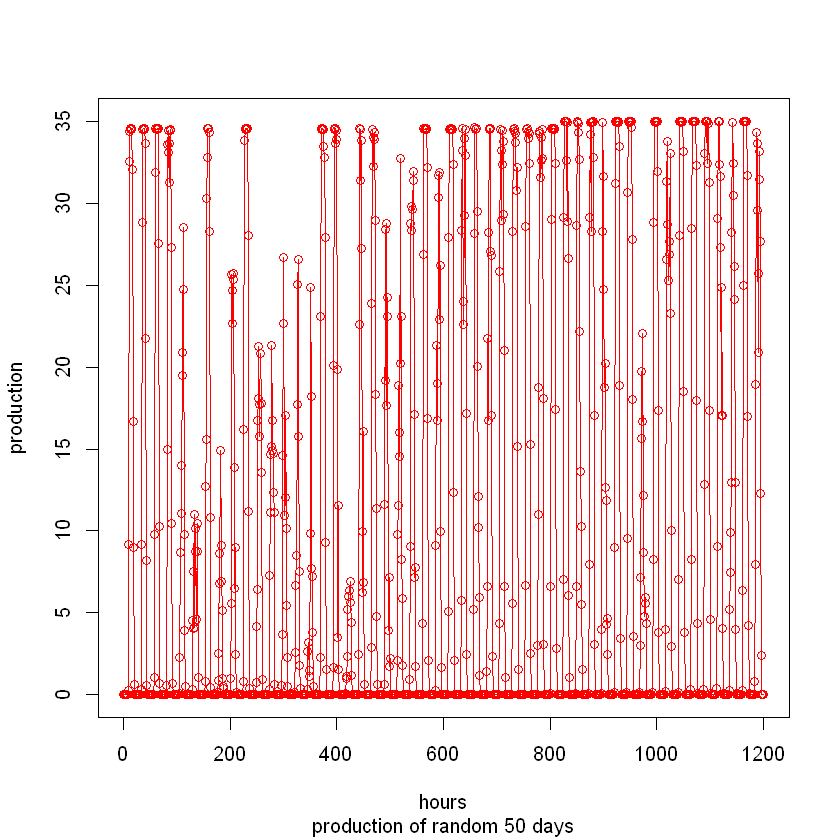

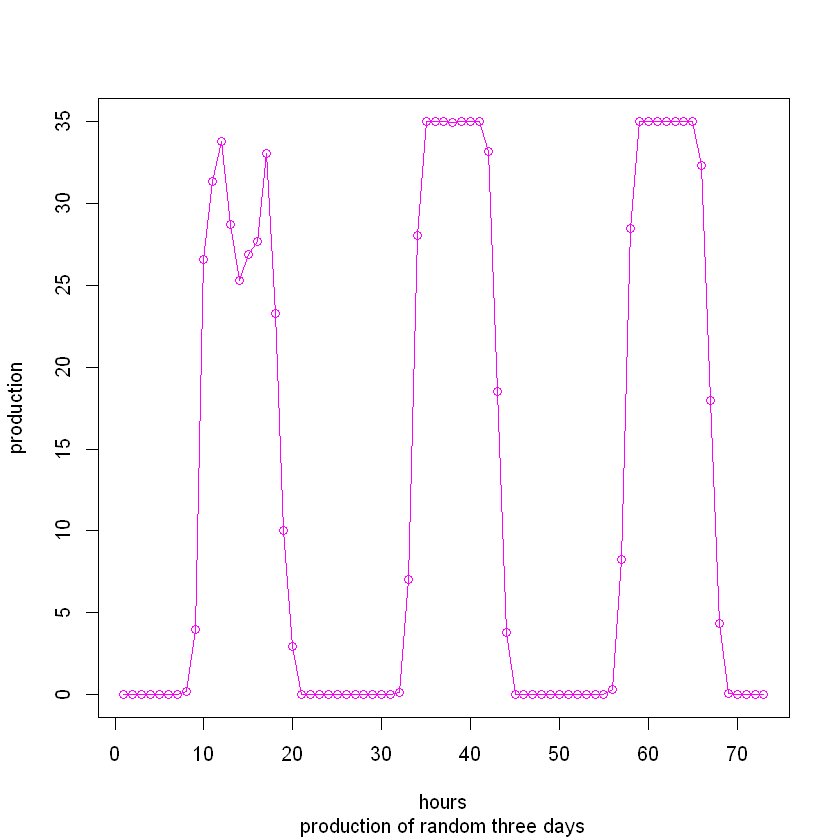

In [440]:
production=production[order(date,hour)]
production$production=ts(production$production,frequency=24)
plot(production$production[4000:10000],main="Zoomed Hourly Data", sub= "production in 250 random days", xlab="hours",ylab="production",type="o", col="blue")
plot(production$production[9000:10200],sub="production of random 50 days", xlab="hours",ylab="production",type="o", col="red")
plot(production$production[10008:10080],sub="production of random three days", xlab="hours",ylab="production",type="o", col="magenta")

#### As we zoom in, the daily patterns are more visible.

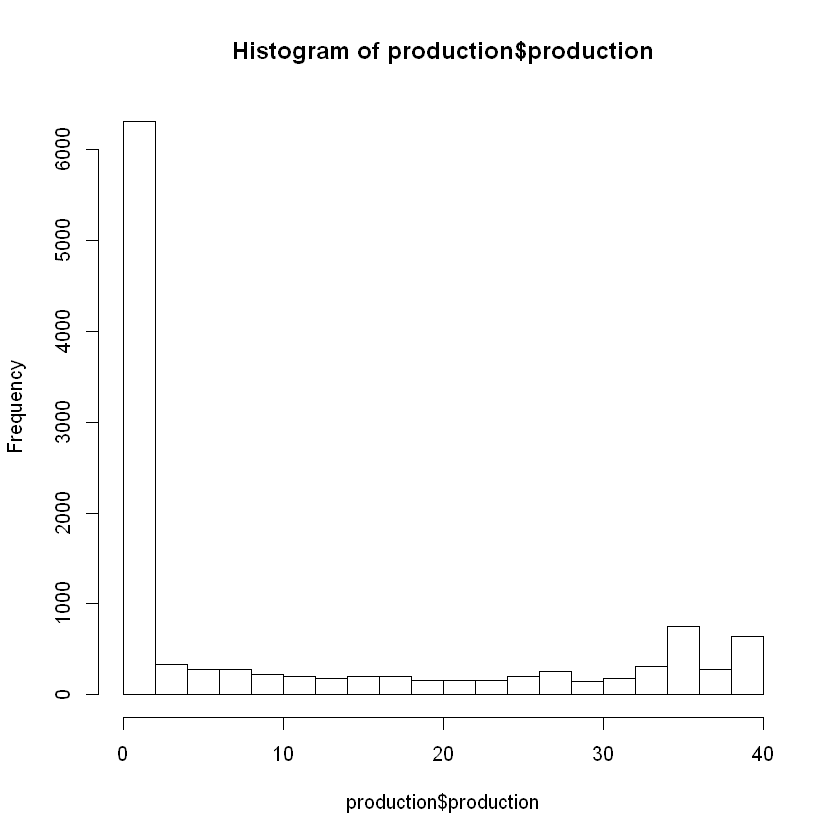

In [441]:
hist(production$production)

### 0 value is the most common production rate in terms of hourly production.

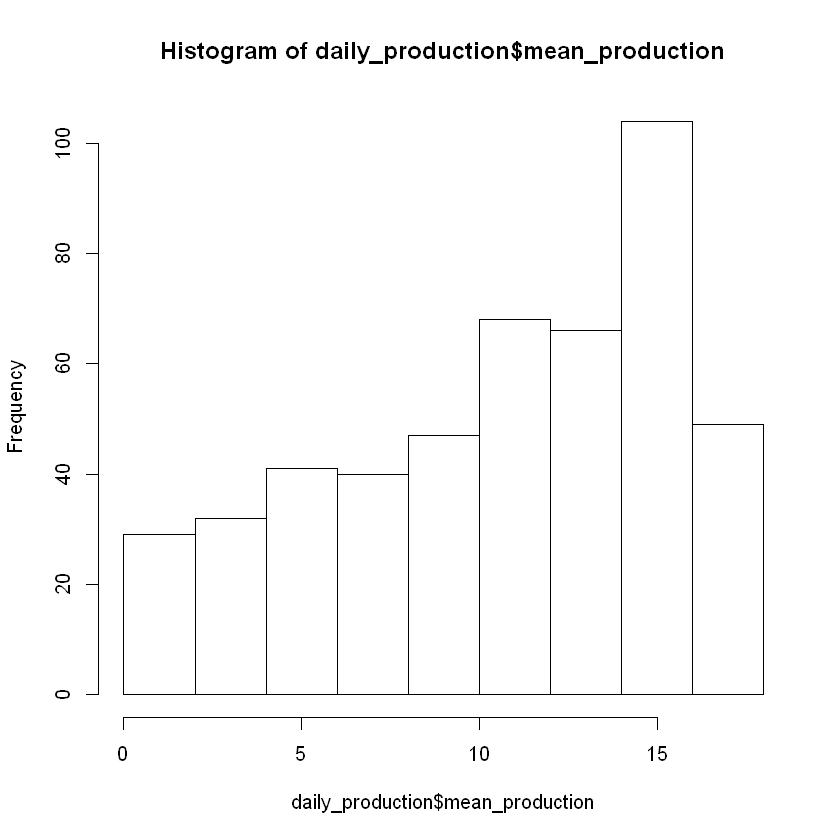

In [442]:
hist(daily_production$mean_production)

### When we look at the daily mean production rates, it can be seen that 15 is the most common daily average.

In [443]:
daily_production = production[,list(mean_production=mean(production,na.rm=T)),by=list(date)]
head(daily_production)

date,mean_production
2021-02-01,0.902875
2021-02-02,1.990417
2021-02-03,1.137083
2021-02-04,2.308333
2021-02-05,2.555667
2021-02-06,2.638750


In [444]:
mean_production = ts(daily_production$mean_production, frequency = 7)
is.ts(mean_production)


[1] TRUE

In [445]:
daily_production = daily_production[,diff_1:=as.numeric(mean_production)-as.numeric(shift(mean_production,1))]
head(daily_production)

date,mean_production,diff_1
2021-02-01,0.902875,NA
2021-02-02,1.990417,1.08754167
2021-02-03,1.137083,-0.85333333
2021-02-04,2.308333,1.17125000
2021-02-05,2.555667,0.24733333
2021-02-06,2.638750,0.08308333


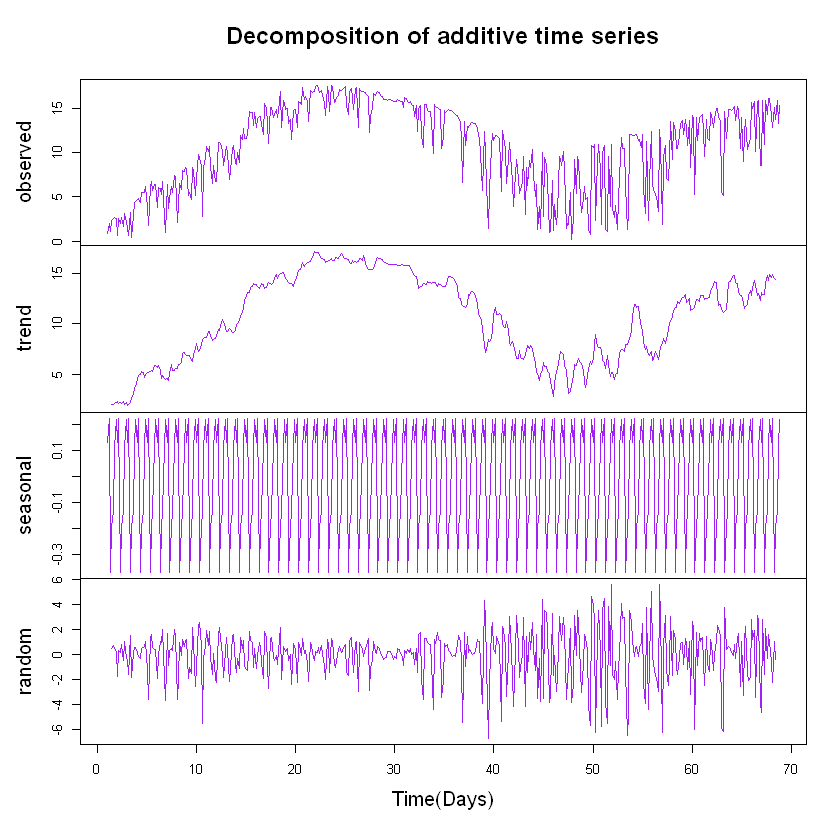

In [446]:
decomp = decompose(mean_production)
plot(decomp, xlab = "Time(Days)", col = "purple")

In the decomposition plot of the daily mean production above, it is seen that there is a trend cycle and seasonality in the data. 

### 3. Approach

During the competition phase, Linear Regression models,  Seasonal Auto Regressive Integrated Moving Average(ARIMA), Seasonal Auto Regressive Integrated Moving Average with Exogeneous Input (SARIMAX) are tried. Then, the one which gives the best result - Seasonal ARIMA Model- is selected. 
For evaluation, mean absolute percentage error(MAPE) and weighted mean absolute percentage error(WMAPE) metrics are considered as can be seen at the comparison part of the report.

In [447]:
weather = fread("2022-05-26_weather.csv")
production = fread("2022-05-26_production.csv")

production = production[order(date,hour)]
production = production[,month:= as.factor(month(date))]
production = production[,quart:= as.factor(quarter(date))]
head(production,3)

date,hour,production,month,quart
2021-02-01,0,0,2,1
2021-02-01,1,0,2,1
2021-02-01,2,0,2,1


In [448]:
# transform long weather to wide
wide_weather=dcast(weather,date+hour~variable+lat+lon,value.var='value')

In [449]:
# merge with production with forecast dates
production_with_weather=merge(production,wide_weather,by=c('date','hour'))
train_data=production_with_weather[date<'2022-03-01']
test_data=production_with_weather[date>='2022-03-01' & date<='2022-05-24']
tail(train_data[,1:6],3)
head(test_data[,1:6],3)
tail(test_data[,1:6],2)
nrow(train_data) 
nrow(test_data)

date,hour,production,month,quart,CLOUD_LOW_LAYER_36.25_33
2022-02-28,21,0,2,1,99.2
2022-02-28,22,0,2,1,100.0
2022-02-28,23,0,2,1,98.8


date,hour,production,month,quart,CLOUD_LOW_LAYER_36.25_33
2022-03-01,0,0,3,1,98.6
2022-03-01,1,0,3,1,98.9
2022-03-01,2,0,3,1,98.6


date,hour,production,month,quart,CLOUD_LOW_LAYER_36.25_33
2022-05-24,22,0,5,2,0
2022-05-24,23,0,5,2,0


[1] 9288

[1] 2040

In [450]:
# train with all variables
lm_model=lm(production~.,train_data[,-c('date'),with=F])
summary(lm_model)


Call:
lm(formula = production ~ ., data = train_data[, -c("date"), 
    with = F])

Residuals:
    Min      1Q  Median      3Q     Max 
-40.038  -5.892  -1.236   4.156  32.142 

Coefficients: (3 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.597e+02  9.215e+00 -17.332  < 2e-16 ***
hour                        -2.900e-01  1.541e-02 -18.823  < 2e-16 ***
month2                      -3.697e+00  4.358e-01  -8.484  < 2e-16 ***
month3                      -4.248e+00  4.956e-01  -8.572  < 2e-16 ***
month4                      -6.062e+00  5.764e-01 -10.518  < 2e-16 ***
month5                      -7.185e+00  6.674e-01 -10.765  < 2e-16 ***
month6                      -4.136e+00  6.938e-01  -5.961 2.60e-09 ***
month7                      -7.193e+00  7.965e-01  -9.030  < 2e-16 ***
month8                      -7.815e+00  8.035e-01  -9.726  < 2e-16 ***
month9                      -4.050e+00  6.956e-01  -5.82

We see that the trend variable, the categoric month variables showing seasonality effect and the weather measurement variables are all significant. The reason we get quart values as NA, can be high correlation (perfect multicollinearity) between predictors. When we scan the coefficients in the model summary, we see that the categoric quarter variables are valued as 'NA' which means that the model refused to use these variables. Hence, we test the correlation between month and quart variables and decide whether to remove it or not.

In [451]:
require(ggcorrplot)
cor(as.numeric(production$month),as.numeric(production$quart))


[1] 0.9706307

##### quart characteristics are seen as NA in the summary due to that reason, so we remove them.


In [452]:
lm_model2=lm(production~.-quart,train_data[,-c('date'),with=F])
summary(lm_model2)
forecasts = data.table(test_data[,1:3], pred_lm=predict(lm_model2,test_data))
head(forecasts)


Call:
lm(formula = production ~ . - quart, data = train_data[, -c("date"), 
    with = F])

Residuals:
    Min      1Q  Median      3Q     Max 
-40.038  -5.892  -1.236   4.156  32.142 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.597e+02  9.215e+00 -17.332  < 2e-16 ***
hour                        -2.900e-01  1.541e-02 -18.823  < 2e-16 ***
month2                      -3.697e+00  4.358e-01  -8.484  < 2e-16 ***
month3                      -4.248e+00  4.956e-01  -8.572  < 2e-16 ***
month4                      -6.062e+00  5.764e-01 -10.518  < 2e-16 ***
month5                      -7.185e+00  6.674e-01 -10.765  < 2e-16 ***
month6                      -4.136e+00  6.938e-01  -5.961 2.60e-09 ***
month7                      -7.193e+00  7.965e-01  -9.030  < 2e-16 ***
month8                      -7.815e+00  8.035e-01  -9.726  < 2e-16 ***
month9                      -4.050e+00  6.956e-01  -5.823 5.97e-09 ***
month10           

date,hour,production,pred_lm
2022-03-01,0,0,1.1488514
2022-03-01,1,0,1.4825389
2022-03-01,2,0,1.0962537
2022-03-01,3,0,0.5609687
2022-03-01,4,0,0.5853747
2022-03-01,5,0,0.8957835


As it can be seen, we did not get a warning when we wanted to make predictions and the model did not change due to removing the 'quart' variable. Thus, we can confidently say that the variable is not used in the model and its removal is required.


	Breusch-Godfrey test for serial correlation of order up to 52

data:  Residuals
LM test = 7888.8, df = 52, p-value < 2.2e-16


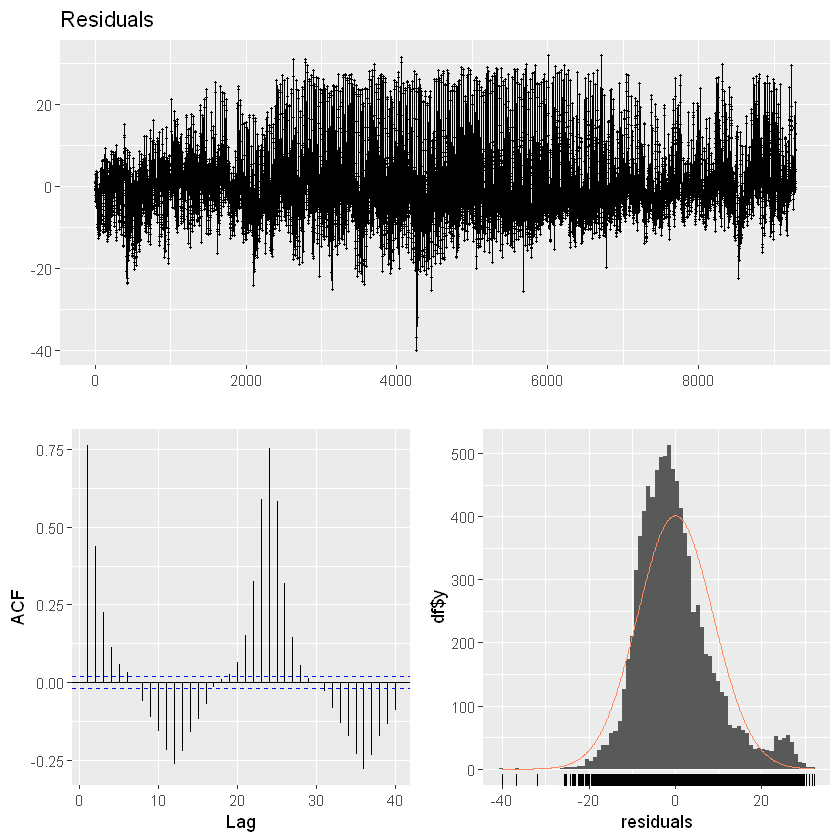

In [453]:
checkresiduals(lm_model2)

 It is evident that there is a seasonality caused by hours of the day which also can be observed from the acf of residuals where auto-correlation made a peak at lag 24. Therefore, taking the hourly seasonality into account in our model will improve our predictions.

In [454]:
#LINEAR MODEL WITH CATEGORIC HOUR VARIABLE
train_data = train_data[,hour:= as.factor(hour)]
test_data = test_data[,hour:=as.factor(hour)]

In [455]:
lm_hourly=lm(production~.-quart,train_data[,-c('date'),with=F])
summary(lm_hourly)


Call:
lm(formula = production ~ . - quart, data = train_data[, -c("date"), 
    with = F])

Residuals:
    Min      1Q  Median      3Q     Max 
-35.481  -3.605   0.277   3.766  23.997 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -6.623e+01  6.502e+00 -10.186  < 2e-16 ***
hour1                        5.314e-02  4.370e-01   0.122 0.903224    
hour2                        5.428e-02  4.374e-01   0.124 0.901243    
hour3                        5.879e-02  4.380e-01   0.134 0.893244    
hour4                        8.079e-02  4.391e-01   0.184 0.854017    
hour5                        1.294e-01  4.400e-01   0.294 0.768678    
hour6                        1.113e+00  4.408e-01   2.525 0.011591 *  
hour7                        7.914e+00  4.397e-01  17.997  < 2e-16 ***
hour8                        1.792e+01  4.412e-01  40.613  < 2e-16 ***
hour9                        2.272e+01  4.484e-01  50.679  < 2e-16 ***
hour10            

In [456]:
forecasts[,pred_lm_hourly:=predict(lm_hourly,test_data)]
#checkresiduals(lm_hourly)
head(forecasts,25)


date,hour,production,pred_lm,pred_lm_hourly
2022-03-01,0,0.00,1.1488514,-6.755612
2022-03-01,1,0.00,1.4825389,-6.312143
2022-03-01,2,0.00,1.0962537,-6.104661
2022-03-01,3,0.00,0.5609687,-5.820723
2022-03-01,4,0.00,0.5853747,-5.323716
2022-03-01,5,0.00,0.8957835,-5.383170
2022-03-01,6,0.00,2.3413003,-3.781334
2022-03-01,7,0.53,5.2773513,4.171930
2022-03-01,8,3.65,2.4435191,14.670768
2022-03-01,9,14.61,-0.0842048,18.650784


In [457]:
train_data$production = ts(train_data$production)
is.ts(train_data$production)

[1] TRUE

In [458]:
#ARIMA MODEL
arima_model = auto.arima(train_data$production,seasonal=F,trace=T,stepwise=T,approximation=T) 


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 55557.13
 ARIMA(0,1,0) with drift         : 58555.86
 ARIMA(1,1,0) with drift         : 55863.46
 ARIMA(0,1,1) with drift         : 55753.76
 ARIMA(0,1,0)                    : 58553.85
 ARIMA(1,1,2) with drift         : 55554.12
 ARIMA(0,1,2) with drift         : 55553.35
 ARIMA(0,1,3) with drift         : 55553.17
 ARIMA(1,1,3) with drift         : 55556.25
 ARIMA(0,1,4) with drift         : 55555.05
 ARIMA(1,1,4) with drift         : Inf
 ARIMA(0,1,3)                    : 55551.16
 ARIMA(0,1,2)                    : 55551.34
 ARIMA(1,1,3)                    : 55554.25
 ARIMA(0,1,4)                    : 55553.04
 ARIMA(1,1,2)                    : 55552.12
 ARIMA(1,1,4)                    : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,3)                    : 55554.99

 Best model: ARIMA(0,1,3)                    



In [459]:
arima_model

Series: train_data$production 
ARIMA(0,1,3) 

Coefficients:
         ma1     ma2     ma3
      0.5984  0.1552  0.0152
s.e.  0.0104  0.0120  0.0103

sigma^2 estimated as 23.19:  log likelihood=-27773.49
AIC=55554.99   AICc=55554.99   BIC=55583.53

In [460]:
preds = forecast(arima_model, nrow(test_data))
forecasts[,pred_arima:=as.numeric(preds$mean)]


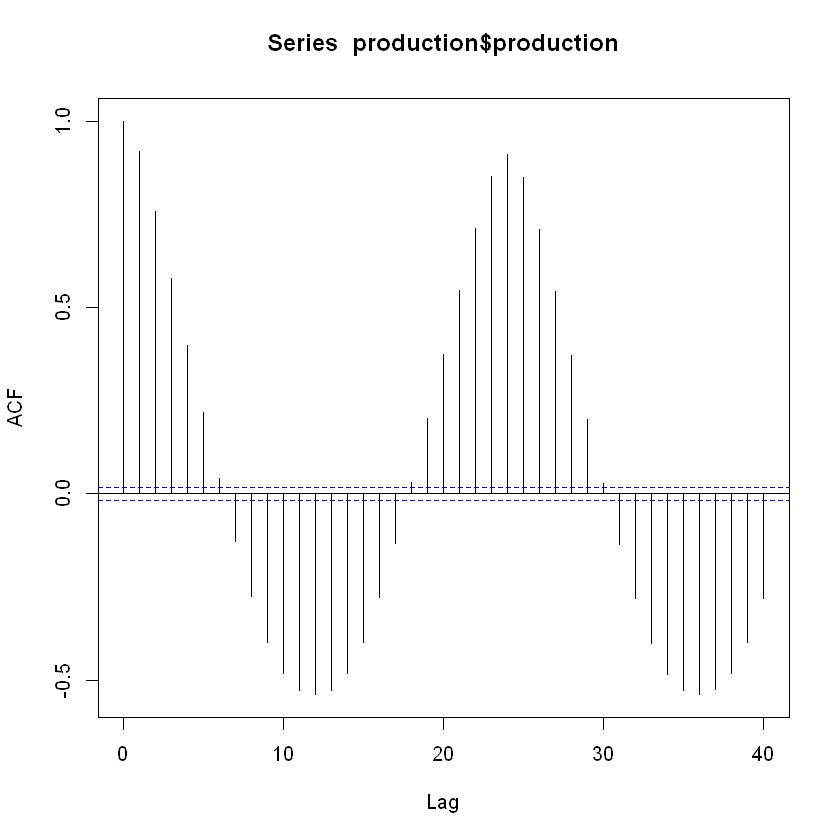

In [461]:

acf(production$production)


In [462]:
library(urca)
unt_test1=ur.kpss(train_data$production) 
summary(unt_test1)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 4.3476 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


#### As can be seen clearly, the production data is not stationary. Therefore, we will need differencing eventually to make the series stationary.

In [463]:
train_data[,diff_series:=production-shift(production,24)]
#From the autocorrelation function above, we can see the daily seasonality, and therefore we have obtained 24 lagged values
head(train_data,25)

date,hour,production,month,quart,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,...,TEMP_36.25_33,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5,diff_series
2021-02-01,0,0.000,2,1,45,31,3,53,10,...,278.620,279.080,280.130,276.110,277.770,280.650,274.830,278.170,275.730,NA
2021-02-01,1,0.000,2,1,44,26,19,64,21,...,277.950,278.950,281.050,276.130,277.640,280.380,274.710,278.250,275.540,NA
2021-02-01,2,0.000,2,1,37,35,35,60,19,...,277.368,280.028,281.858,274.988,276.928,280.148,274.638,278.268,275.448,NA
2021-02-01,3,0.000,2,1,43,45,46,51,24,...,278.405,280.555,281.695,274.565,277.075,280.405,274.535,278.015,275.685,NA
2021-02-01,4,0.000,2,1,72,95,46,16,57,...,278.512,280.742,280.662,274.822,277.292,280.082,274.362,277.902,275.592,NA
2021-02-01,5,0.000,2,1,69,95,31,24,68,...,278.064,280.494,280.294,275.064,277.504,279.474,274.064,278.194,275.714,NA
2021-02-01,6,0.000,2,1,75,96,53,21,63,...,278.624,280.684,281.474,274.854,277.074,280.054,274.024,278.464,276.564,NA
2021-02-01,7,0.000,2,1,79,97,65,16,72,...,278.692,280.732,281.522,274.532,278.342,281.502,274.262,278.482,277.002,NA
2021-02-01,8,0.189,2,1,83,97,60,13,78,...,279.296,280.806,280.616,274.506,278.626,280.996,274.166,278.676,276.626,NA
2021-02-01,9,1.350,2,1,86,97,67,20,78,...,280.070,281.090,281.930,277.250,279.430,282.220,274.580,279.150,277.820,NA


In [464]:
library(urca)

unt_test1=ur.kpss(train_data$diff_series) 
summary(unt_test1)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 0.0303 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


The test-statistic is below all the critical values meaning that further differencing is not required.

There is still remarkable auto-correlation and partial auto-correlation at lag 24. However, it can be handled by an AR model with seasonal component 24.

In [465]:
#SARIMA MODEL
sarima_model=auto.arima(train_data$diff_series,seasonal=T,trace=T,stepwise=T,approximation=T)
sarima_model


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 50518.63
 ARIMA(0,0,0) with non-zero mean : 58604.59
 ARIMA(1,0,0) with non-zero mean : 50674.02
 ARIMA(0,0,1) with non-zero mean : 53065.32
 ARIMA(0,0,0) with zero mean     : 58602.64
 ARIMA(1,0,2) with non-zero mean : 50514.93
 ARIMA(0,0,2) with non-zero mean : 51459.56
 ARIMA(1,0,1) with non-zero mean : 50514.03
 ARIMA(2,0,1) with non-zero mean : 50516.05
 ARIMA(2,0,0) with non-zero mean : 50524.87
 ARIMA(1,0,1) with zero mean     : 50512.03
 ARIMA(0,0,1) with zero mean     : 53063.35
 ARIMA(1,0,0) with zero mean     : 50672.03
 ARIMA(2,0,1) with zero mean     : 50514.06
 ARIMA(1,0,2) with zero mean     : 50512.94
 ARIMA(0,0,2) with zero mean     : 51457.58
 ARIMA(2,0,0) with zero mean     : 50522.88
 ARIMA(2,0,2) with zero mean     : 50516.63

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,0,1) with zero mean     : 50511.93

 Best model: ARIMA(1,0,1) with zero mean

Series: train_data$diff_series 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1     ma1
      0.6847  0.1764
s.e.  0.0099  0.0135

sigma^2 estimated as 13.65:  log likelihood=-25252.96
AIC=50511.92   AICc=50511.93   BIC=50533.33


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with zero mean
Q* = 34.842, df = 8, p-value = 2.857e-05

Model df: 2.   Total lags used: 10



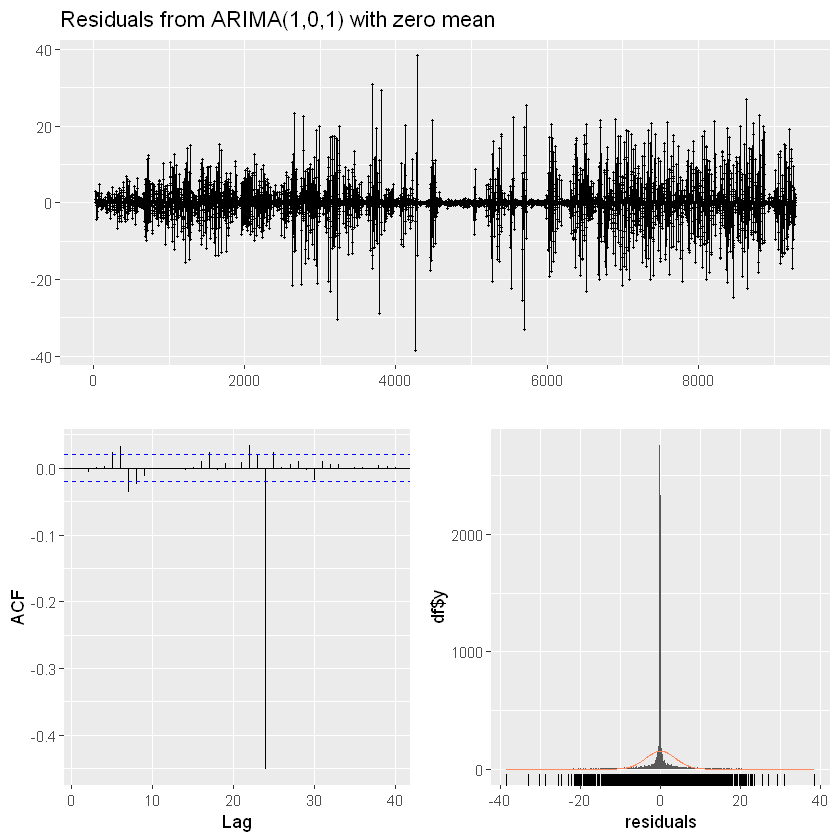

In [466]:
checkresiduals(sarima_model)

Compared to the previous ACF plot of the pure production series, there is a significant reduction in the auto-correlation at lag 24.
The residuals seem to be distributed normally on the other hand. However, the frequency of value '0' is extremely high.

In [467]:
predicted_diff = forecast(sarima_model, nrow(test_data))


In [468]:
forecasts[,pred_sarima:=as.numeric(predicted_diff$mean)+shift(production,24)]


In [469]:
cor(production_with_weather[,c(3,10,19,28,34)])
head(production)

,production,CLOUD_LOW_LAYER_36.5_33.25,DSWRF_36.5_33.25,REL_HUMIDITY_36.5_33.25,TEMP_36.25_33.25
production,1.0000000,-0.1897240,0.6868236,-0.4866605,0.4538170
CLOUD_LOW_LAYER_36.5_33.25,-0.1897240,1.0000000,-0.1695533,0.5070154,-0.3004625
DSWRF_36.5_33.25,0.6868236,-0.1695533,1.0000000,-0.5880281,0.4879438
REL_HUMIDITY_36.5_33.25,-0.4866605,0.5070154,-0.5880281,1.0000000,-0.7395490
TEMP_36.25_33.25,0.4538170,-0.3004625,0.4879438,-0.7395490,1.0000000


date,hour,production,month,quart
2021-02-01,0,0,2,1
2021-02-01,1,0,2,1
2021-02-01,2,0,2,1
2021-02-01,3,0,2,1
2021-02-01,4,0,2,1
2021-02-01,5,0,2,1


### It is seen that DSWRF variable is highly correlated with the production. Thus, using it as an external regressor in a sarima model would improve our predictions.

In [470]:
#SARIMAX
train_data[,dwsrf_diff:=`DSWRF_36.5_33.25`-shift(`DSWRF_36.5_33.25`,24)]
tail(train_data)

date,hour,production,month,quart,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,...,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5,diff_series,dwsrf_diff
2022-02-28,18,0.62,2,1,98.6,97.6,98.0,100,70.5,...,281.123,282.703,278.263,280.753,284.883,276.243,280.233,278.173,-0.32,-230.740
2022-02-28,19,0.00,2,1,98.8,98.2,98.4,100,77.9,...,281.164,282.414,278.164,280.504,283.854,276.294,280.224,277.924,0.00,-175.540
2022-02-28,20,0.00,2,1,99.1,98.6,98.7,100,82.3,...,281.300,282.600,278.000,280.700,283.800,276.200,279.900,277.900,0.00,-140.440
2022-02-28,21,0.00,2,1,99.2,98.8,99.0,100,85.3,...,281.214,282.714,278.014,280.214,283.614,276.214,279.714,277.914,0.00,-117.024
2022-02-28,22,0.00,2,1,100.0,99.7,100.0,100,100.0,...,281.292,282.792,278.292,280.592,283.592,276.292,279.692,277.992,0.00,0.000
2022-02-28,23,0.00,2,1,98.8,98.5,100.0,100,100.0,...,281.160,282.860,278.560,280.360,283.360,276.360,279.660,278.260,0.00,0.000


In [471]:
reg_matrix=cbind(train_data$dwsrf_diff)

In [472]:
sarimax_model= auto.arima(train_data$diff_series,xreg=reg_matrix,seasonal=T,trace=T,stepwise=T,approximation=T)
sarimax_model


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 50370.4
 ARIMA(0,0,0) with non-zero mean : 57141.94
 ARIMA(1,0,0) with non-zero mean : 50534.86
 ARIMA(0,0,1) with non-zero mean : 52257.75
 ARIMA(0,0,0) with zero mean     : 57140.03
 ARIMA(1,0,2) with non-zero mean : 50367.39
 ARIMA(0,0,2) with non-zero mean : 51011.01
 ARIMA(1,0,1) with non-zero mean : 50365.59
 ARIMA(2,0,1) with non-zero mean : 50368.39
 ARIMA(2,0,0) with non-zero mean : 50374.62
 ARIMA(1,0,1) with zero mean     : 50363.6
 ARIMA(0,0,1) with zero mean     : 52255.79
 ARIMA(1,0,0) with zero mean     : 50532.87
 ARIMA(2,0,1) with zero mean     : 50366.4
 ARIMA(1,0,2) with zero mean     : 50365.4
 ARIMA(0,0,2) with zero mean     : 51009.03
 ARIMA(2,0,0) with zero mean     : 50372.63
 ARIMA(2,0,2) with zero mean     : 50368.42

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,0,1) with zero mean     : 50363.4

 Best model: Regression with ARIMA(1,0,1) err

Series: train_data$diff_series 
Regression with ARIMA(1,0,1) errors 

Coefficients:
         ar1     ma1    xreg
      0.6431  0.1871  0.0128
s.e.  0.0112  0.0139  0.0010

sigma^2 estimated as 13.44:  log likelihood=-25177.7
AIC=50363.4   AICc=50363.4   BIC=50391.93

In [473]:
forecas=forecast(sarimax_model,xreg=reg_matrix,h=nrow(test_data))


Warning message in forecast.forecast_ARIMA(sarimax_model, xreg = reg_matrix, h = nrow(test_data)):
"Upper prediction intervals are not finite."

## 4. Results

In [474]:
forecasts[,pred_sarimax:=as.numeric(forecas$mean[25:2064])+shift(production,24)]


In [475]:
accu=function(actual,forecast){
  n=length(actual)
  error=actual-forecast
  mean=mean(actual)
  sd=sd(actual)
  CV=sd/mean
  FBias=sum(error)/sum(actual)
  MAPE=sum(abs(error/actual))/n
  RMSE=sqrt(sum(error^2)/n)
  MAD=sum(abs(error))/n
  MADP=sum(abs(error))/sum(abs(actual))
  WMAPE=MAD/mean
  l=data.frame(n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE)
  return(l)
}

In [476]:
accu(forecasts$production,forecasts$pred_lm)

n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
2040,12.13835,14.68011,1.209399,0.3211616,Inf,10.34309,7.426233,0.6117991,0.6117991


In [477]:
accu(forecasts$production,forecasts$pred_lm_hourly)

n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
2040,12.13835,14.68011,1.209399,0.2758685,Inf,6.553564,4.959768,0.408603,0.408603


In [478]:
accu(forecasts$production,forecasts$pred_arima)

n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
2040,12.13835,14.68011,1.209399,1.000834,Inf,19.05217,12.14847,1.000834,1.000834


In [479]:
accu(forecasts$production[-c(1:24)],forecasts$pred_sarima[-c(1:24)])

n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
2016,12.22011,14.72311,1.204826,0.009566995,Inf,7.171208,3.145203,0.2573793,0.2573793


In [480]:
accu(forecasts$production[-c(1:24)],forecasts$pred_sarimax[-c(1:24)])

n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
2016,12.22011,14.72311,1.204826,0.006969189,Inf,7.231148,3.405736,0.2786993,0.2786993


## 5. Conclusions and Future Work

### At the very beginning, we have visualized data to understand general patterns. With the decomposition of the time series, we have found apparent trend cycles and seasonalities. These findings have been used while forming linear regression models. 

### To have a wider understanding, after the regression model, we have used time series analyses methods. When the production amounts are investigated via unit root test, it is seen that the time series is not stationary which meant that differencing is required. In order to find the appropriate lag to make the series stationary, we checked the corresponding ACF plot and we saw that at lag 24, the auto-correlation made a peak. Therefore, we used seasonal differencing at lag 24.

## Possible Improvements

### At first, in data manipulation process, outlier detection might have improved our results due to the improved quality of the dataset.
### Second, there are NA values in the data which we simply excluded/eliminated. However, to impute those NA values and use them would be a better approach overall since we would not have lost a large amount of data.
### Third, auto.arima function does not span the whole solution space since it is very time consuming. Benefiting from the related correlation and auto correlation plots, to select reasonable parameter values for the models could have given better results.
### Lastly, while making forecasts with ARIMA models, it would give better results to use our forecasts as new data points to shed light onto the following predictions. Since, it is time consuming to build a new ARIMA model at each step and assuming that one data point would not make a big difference, we built our models with the non-changing train set and made predictions forward with the same models.

## 6. Code